<h1> Analysing police activity</h1>

Based upon datacamp's Analyzing Police Activity with pandas - https://www.datacamp.com/courses/analyzing-police-activity-with-pandas

Data from The Stanford Open Policing Project - https://openpolicing.stanford.edu/

In [1]:
# import libraries

# pandas for data wrangling
import pandas as pd

# matplotlib for plotting
import matplotlib.pyplot as plt

In [2]:
# read police data from csv to pandas dataframe

police_data = pd.read_csv('data/police.csv')

In [3]:
# examine data - helicopter view

police_data.head()

state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       False      0-15 Min               False  Zone X4  
1       Citation       False      0-15 Min               False  Zone K3  
2       Citation       False      0-15 Min               False  Zone X4  
3  Arrest Driver        True     16-30 Min               False  Zone X1  
4       Citation       False      0-15 Min               False  Zone X3

In [4]:
# how many null values per column?
police_data.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
# what is the shape of the dataframe? (rows, columns)
police_data.shape

(91741, 15)

In [6]:
# another way of looking at data with info() method
police_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [7]:
# useful statistics with describe() method
police_data.describe(include='all')

state   stop_date stop_time  county_name driver_gender driver_race  \
count   91741       91741     91741          0.0         86536       86539   
unique      1        3757      1431          NaN             2           5   
top        RI  2007-05-16     11:00          NaN             M       White   
freq    91741          63       358          NaN         62762       61872   
mean      NaN         NaN       NaN          NaN           NaN         NaN   
std       NaN         NaN       NaN          NaN           NaN         NaN   
min       NaN         NaN       NaN          NaN           NaN         NaN   
25%       NaN         NaN       NaN          NaN           NaN         NaN   
50%       NaN         NaN       NaN          NaN           NaN         NaN   
75%       NaN         NaN       NaN          NaN           NaN         NaN   
max       NaN         NaN       NaN          NaN           NaN         NaN   

       violation_raw violation search_conducted         search_type  \
count          86539     86539            91741                3307   
unique            12         6                2                  25   
top         Speeding  Speeding            False  Incident to Arrest   
freq           48424     48424            88434                1290   
mean             NaN       NaN              NaN                 NaN   
std              NaN       NaN              NaN                 NaN   
min              NaN       NaN              NaN                 NaN   
25%              NaN       NaN              NaN                 NaN   
50%              NaN       NaN              NaN                 NaN   
75%              NaN       NaN              NaN                 NaN   
max              NaN       NaN              NaN                 NaN   

       stop_outcome is_arrested stop_duration drugs_related_stop district  
count         86539       86539         86539              91741    91741  
unique            6           2             3                  2        6  
top        Citation       False      0-15 Min              False  Zone X4  
freq          77092       83461         69579              90879    24279  
mean            NaN         NaN           NaN                NaN      NaN  
std             NaN         NaN           NaN                NaN      NaN  
min             NaN         NaN           NaN                NaN      NaN  
25%             NaN         NaN           NaN                NaN      NaN  
50%             NaN         NaN           NaN                NaN      NaN  
75%             NaN         NaN           NaN                NaN      NaN  
max             NaN         NaN           NaN                NaN      NaN

- all our attributes are either dates, times, or categorical

In [8]:
# drop useless data - county_name is totally useless, and we have only one state in the data - Rhode Island 
# (btw. the smallest state of US)
police_data.drop(['county_name', 'state'], axis='columns', inplace=True)

In [9]:
# check if drop with "inplace" parameter worked
print(police_data.shape)
print(police_data.columns)

(91741, 13)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


In [10]:
# let's drop all rows with missing gender
police_data.dropna(subset=['driver_gender'], inplace=True)

In [11]:
# let's check again for nulls in the data
police_data.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [12]:
# let's create datetime index; index = "names of rows"
# this could be useful as we basically have data identified by dates and times
# and yes, we could theoretically have multiple rows with the same index if police stops were simultaneous

# first we combine columns stop_date and stop_time to form "date time"
combined = police_data.stop_date.str.cat(police_data.stop_time, sep=' ') 

# change string type for our new combined column to actual pandas datetime type
police_data['stop_datetime'] = pd.to_datetime(combined)

# change original index to our new datetime index
police_data.set_index('stop_datetime', inplace=True)

In [13]:
# check index of police_data dataframe
police_data.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [14]:
# we can see that all our columns are of dtype object, meaning they are strings
police_data.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [15]:
# we know that "is_arrested" column is binary
police_data.is_arrested.value_counts()

False    83458
True      3078
Name: is_arrested, dtype: int64

In [16]:
# so let's recast it to boolean datatype
police_data.is_arrested = police_data.is_arrested.astype('bool')

In [17]:
# let's check datatypes of our columns now, looking good now
police_data.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [18]:
# let's look at "violation" attribute - value counts info could be informative

# absolute counts
print(police_data.violation.value_counts())

print()

# and normalized counts (fractions)
print(police_data.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


- 2856 "fuck seatbelts" - outrageous!

In [19]:
# let's look at "violation" vs. "gender"

# filter data for females
female = police_data[police_data['driver_gender'] == 'F']

# filter data for males
male = police_data[police_data['driver_gender'] == 'M']

# looking at value counts for each gender
female_violation = female.violation.value_counts(normalize=True)
male_violation = male.violation.value_counts(normalize=True)

print("Female drivers:\n")
print(female_violation)
print("\n")
print("Male drivers:\n")
print(male_violation)

Female drivers:

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


Male drivers:

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [20]:
# does gender affect who gets a ticket for speeding?

# filtering gender=female and violation=speeding 
female_and_speeding = police_data[(police_data.driver_gender == 'F') & (police_data.violation == 'Speeding')]

# filtering gender=male and violation=speeding 
male_and_speeding = police_data[(police_data.driver_gender == 'M') & (police_data.violation == 'Speeding')]

# looking at value counts for each gender in the case of speeding violation
print("Female drivers:\n")
print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print("\n")
print("Male drivers:\n")
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Female drivers:

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


Male drivers:

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


- arrest rate looks interesting

In [21]:
# let's investigate search rate vs. gender

# search_conducted is boolean column; with respect to mean() True means 1 and False means 0, so taking mean of the column
# we get fraction of stops when also search was conducted

# ...and we are grouping by gender here
print(police_data.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


- usual suspect is male

In [22]:
# does gender affect who is frisked during a search?
# https://dictionary.cambridge.org/dictionary/english/frisk

# let's look at "search_type" column values
# how is frisk defined here? - "...Protective Frisk..."
print(police_data.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [23]:
# filter only those values of search_type containing substring "Protective Frisk", save to new column "frisk"
police_data['frisk'] = police_data.search_type.str.contains('Protective Frisk', na=False)

# new column is of boolean datatype
print(police_data['frisk'].dtypes)

# summing through the column - we get count of frisks conducted
print(police_data['frisk'].sum())

bool
303


In [24]:
# filter only those where search was conducted
searched = police_data[police_data.search_conducted == True]

# calculate the overall frisk rate by taking the mean of frisk
frisk_rate = searched.frisk.mean()
print("overall frisk rate: %s" % frisk_rate)

print()

# grouping by gender
print(searched.groupby('driver_gender').frisk.mean())

overall frisk rate: 0.09162382824312065

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


- not so conclusive difference in frisk rate with respect to gender

In [25]:
# hourly arrest rate could be interesting - does crime go to sleep?

# calculate the overall arrest rate
overall_arrest_rate = police_data.is_arrested.mean()
print("overall arrest rate: %s \n" % overall_arrest_rate)

# calculate the hourly arrest rate, grouping data by index.hour
hourly_arrest_rate = police_data.groupby(police_data.index.hour).is_arrested.mean()

print("Hourly arrest rate: \n")
print(hourly_arrest_rate)

overall arrest rate: 0.0355690117407784 

Hourly arrest rate: 

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


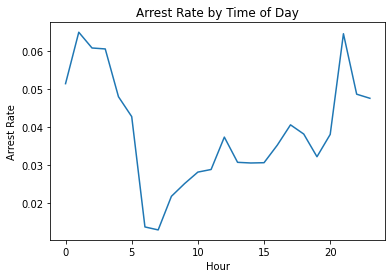

In [26]:
# a plot would be much better representation 
# let's create a line plot of 'hourly_arrest_rate'

# plot series object "hourly_arrest_rate"
hourly_arrest_rate.plot()

# axes labels
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')

# plot title
plt.title('Arrest Rate by Time of Day')

# draw plot
plt.show()

Awesome visualization!

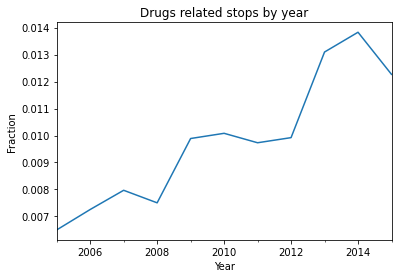

In [27]:
# another interesting thing could be - drugs_related_stop vs. year

# calculate the annual rate of drug-related stops
# we have datetime index, we can easily resample our data with resample() method - to yearly granularity ('A'=annual)
# drugs_related_stop is boolean so we can take mean() to get fraction of all stops
annual_drug_rate = police_data.drugs_related_stop.resample('A').mean()

# plot annual_drug_rate
annual_drug_rate.plot()

# axes labels
plt.xlabel('Year')
plt.ylabel('Fraction')

# plot title
plt.title('Drugs related stops by year')

# draw plot
plt.show()

- Clear trend. Or is it?

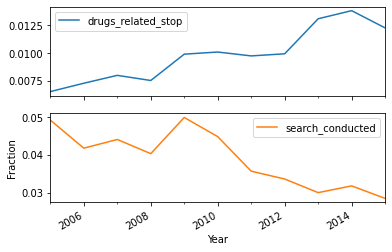

In [28]:
# could this be just effect of increased search rate?

# calculate and save the annual search rate
annual_search_rate = police_data.search_conducted.resample('A').mean()

# concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# plot 2 columnar annual dataframe side by side
annual.plot(subplots=True)

# axes labels
plt.xlabel('Year')
plt.ylabel('Fraction')

# draw plot
plt.show()

- Wow!

In [29]:
# let's put in some geography

# what are the unique districts?
police_data.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [30]:
# let's create a frequency table of districts and violations
all_zones = pd.crosstab(police_data.district, police_data.violation)

# let's look at zones K1< K2 and K3
k_zones = all_zones.loc[['Zone K1', 'Zone K2', 'Zone K3']]
print(k_zones)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


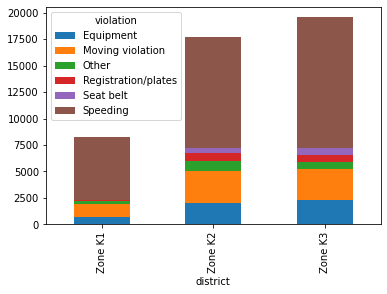

In [31]:
# a bar plot of 'k_zones' would be nice

# stacked bar plot of "k_zones"
k_zones.plot(kind='bar', stacked=True)

# show plot
plt.show()

In [32]:
# investigating "stop_duration"

# what are unique values of "stop_duration"?
print(police_data.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [33]:
# create a dictionary that maps strings to integers - minutes - we are taking the middle value from the interval here
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# convert the 'stop_duration' strings to integers using the map() method
police_data['stop_minutes'] = police_data.stop_duration.map(mapping)

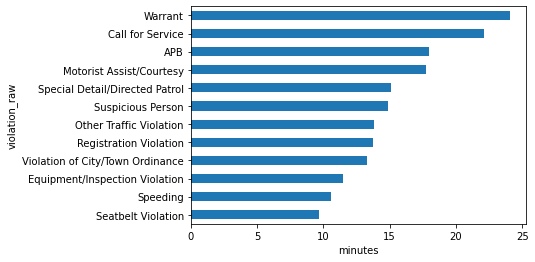

In [34]:
# we can now calculate the mean 'stop_minutes' for each value in 'violation_raw' column
stop_length = police_data.groupby('violation_raw').stop_minutes.mean()

# horizontal bar plot of "stop_length"
stop_length.sort_values().plot(kind='barh')

# axis label
plt.xlabel('minutes')

# show plot
plt.show()

In [35]:
# oh, we have weather data at hand!

# extract weather data from csv and store as pandas dataframe
weather = pd.read_csv('data/weather.csv')

In [36]:
# let's check form of the weather data
weather.head()

STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  

[5 rows x 27 columns]

In [37]:
# let's check form of the weather data
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')

In [38]:
# temperature descriptive statistics
weather[['TMIN', 'TAVG', 'TMAX']].describe()

TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000

- these are most certainly fahrenheits, otherwise they would be literally boiling from time to time at Rhode Island

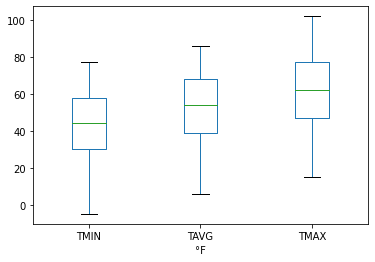

In [39]:
# create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# axis label
plt.xlabel('°F')

# show plot
plt.show()

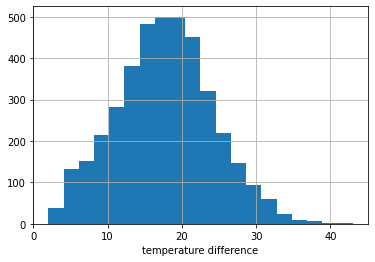

In [40]:
# Are these data thrustworthy? Outdoor temperature - that's natural phenomena, hence we would expect e.g. TMAX-TMIN 
# distribution to resemble the Gaussian distribution.

# temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# create a histogram with 20 bins to visualize "TDIFF" distribution
weather['TDIFF'] .hist(bins=20)

# axis label
plt.xlabel('temperature difference')

# show plot
plt.show()

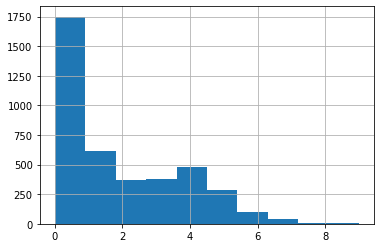

In [41]:
# wt columns match to various bad weather conditions

# filtering only those columns, saving to new dataframe "WT"
WT = weather.loc[:, 'WT01': 'WT22']

# calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# replace missing values in 'bad_conditions' column with integer 0
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].hist()

# show plot
plt.show()

In [42]:
# count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [43]:
# create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# count the unique values in 'rating' column
weather['rating'].value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [44]:
# create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# change the data type of 'rating' to category
cat_type = pd.CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather.rating.astype(cat_type)

# examine the head of 'rating' column now
print(weather['rating'].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


In [45]:
# with categorical values, we can now do something like this
weather[weather['rating'] > 'good'].rating.value_counts()

bad      1836
worse     432
good        0
Name: rating, dtype: int64

In [46]:
# we want to combine the police data with the weather data and examine some effects of weather

# reset the index of police data dataframe
police_data.reset_index(inplace=True)

# create a DataFrame from the 'DATE' and 'rating' columns of the weather data
weather_rating = weather[['DATE', 'rating']]

# left join police_data and weather_rating on dates
pd_weather = pd.merge(left=police_data, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# set "stop_datetime" as the index of pd_weather dataframe
pd_weather.set_index('stop_datetime', inplace=True)

In [47]:
# calculate the overall arrest rate
overall_arrest_rate = pd_weather.is_arrested.mean()
print("overall arrest rate: %s" % overall_arrest_rate)

overall arrest rate: 0.0355690117407784


In [48]:
# calculate the arrest rate for each weather raing
pd_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

- Police protects people by arresting them in case of really bad weather. Just kidding - correlation not automatically causation.

In [49]:
# calculate the arrest rate for each 'violation' and 'rating'
pd_weather.groupby(['violation', 'rating']).is_arrested.mean()

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

In [50]:
# using loc[] to access multi-indexed series

# save the output of the groupby operation from the last exercise
arrest_rate = pd_weather.groupby(['violation', 'rating']).is_arrested.mean()

# accessing arrest rate for moving violations in bad weather
arrest_rate.loc['Moving violation', 'bad']

0.05804964058049641

In [51]:
# accessing arrest rate for for speeding violations in all three weather conditions
arrest_rate.loc['Speeding']

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64

In [52]:
# unstack the "arrest_rate" Series into a DataFrame
arrest_rate.unstack()

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886

In [53]:
# create the same DataFrame using a pivot table
# there are multiple ways to do the same thing in pandas
pd_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886